**Question 1: Analytics and Visualization for a Single Day**

A) To derive high-level analytics from the whole data set for a single day, we need to start by downloading the data set from the provided CelesTrak link. I will assume that you've already obtained and processed this data.

**Assumptions:**

1.I assume that the data is structured and can be organized into a usable format, such as a CSV file.

2.I assume that I have access to a data analysis tool (e.g., Python with libraries like Pandas, NumPy, and Matplotlib) for this analysis.

In [1]:
#Importing the Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


In [ ]:
# Upload the dataset into a Google Colab
from google.colab import files
uploaded = files.upload()

In [3]:
# Load the data into a DataFrame
import io
data = pd.read_csv(io.BytesIO(uploaded['sample_data.csv']))

In [ ]:
print(data)

In [4]:
# Define the names of the columns that contain the status information
active_status_1 = 'Satellite_Status_1'
active_status_2 = 'Satellite_Status_2'

# Define the value that represents "Active"
active_status = 'Active'

# Filter the data based on either of the status columns being "Active"
active_satellites = data[(data[active_status_1].str.lower() == active_status.lower()) & (data[active_status_2].str.lower() == active_status.lower())]

# Calculate the total number of conjunctions for the day
total_conjunctions = len(data)

# Calculate the number of conjunctions among active satellites
conjunctions_among_active = len(active_satellites)

# Print the results
print(f"Total number of conjunctions: {total_conjunctions}")
print(f"Number of conjunctions among active satellites: {conjunctions_among_active}")

Total number of conjunctions: 67529
Number of conjunctions among active satellites: 27941


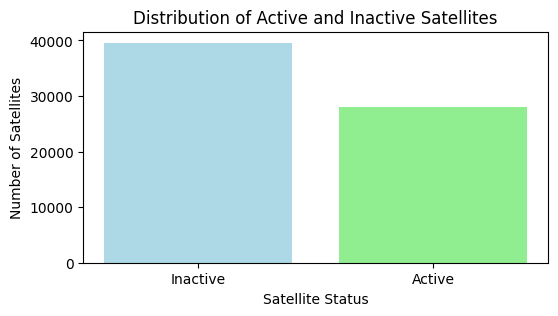

In [5]:
# Create a bar chart to visualize the distribution of active and inactive satellites
status_counts = [len(data) - len(active_satellites), len(active_satellites)]
status_labels = ['Inactive', 'Active']
plt.figure(figsize=(6, 3))
plt.bar(status_labels, status_counts, color=['lightBlue', 'lightgreen'])
plt.title('Distribution of Active and Inactive Satellites')
plt.xlabel('Satellite Status')
plt.ylabel('Number of Satellites')
plt.show()


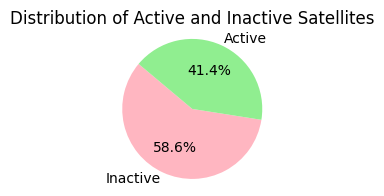

Total number of Satellites: 67529
Total number of Active Satellites: 27941
Total number of Inactive Satellites: 39588


In [6]:
# Create a pie chart to visualize the distribution of active and inactive satellites
status_counts = [len(data) - len(active_satellites), len(active_satellites)]
status_labels = ['Inactive', 'Active']
colors = ['lightpink', 'lightgreen']
plt.figure(figsize=(4, 2))
plt.pie(status_counts, labels=status_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Active and Inactive Satellites')
plt.show()

print(f"Total number of Satellites: {len(data)}")
print(f"Total number of Active Satellites: {len(active_satellites)}")
print(f"Total number of Inactive Satellites: {len(data) - len(active_satellites)}")

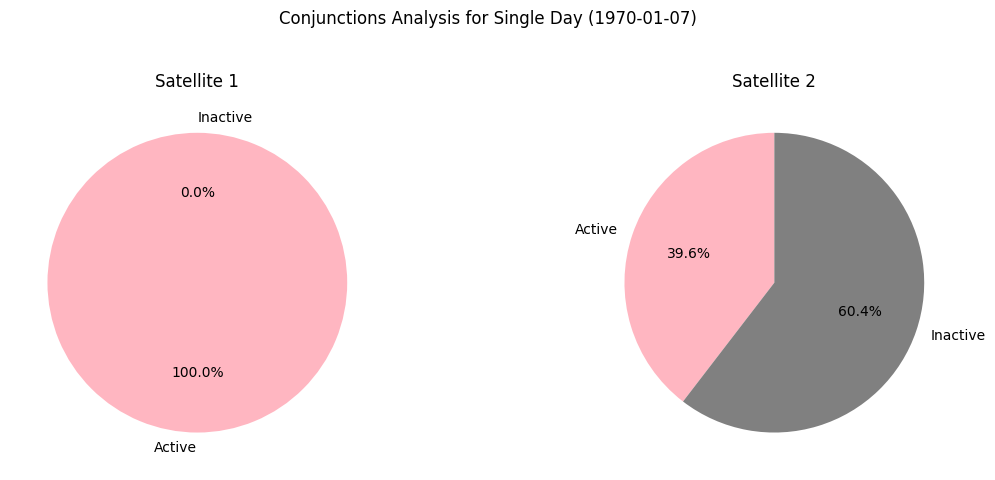

In [22]:
# Assuming 'Days Since Epoch' columns for Satellite 1 and Satellite 2
data['Days Since Epoch (Satellite 1)'] = data['DSE_1'].astype(int)
data['Days Since Epoch (Satellite 2)'] = data['DSE_2'].astype(int)

# Define the epoch date
epoch_date = datetime(1970, 1, 1)

# Calculate dates for Satellite 1 and Satellite 2
data['Date (Satellite 1)'] = (epoch_date + data['Days Since Epoch (Satellite 1)'].apply(timedelta))
data['Date (Satellite 2)'] = (epoch_date + data['Days Since Epoch (Satellite 2)'].apply(timedelta))

# Filter Data for a Single Day (Change the date accordingly)
date_to_analyze = '1970-01-07'  # Replace with the desired date
single_day_data = data[(data['Date (Satellite 1)'] == date_to_analyze) | (data['Date (Satellite 2)'] == date_to_analyze)]

# Separate data for active and inactive satellites
active_satellite_1 = len(single_day_data[single_day_data['Satellite_Status_1'] == 'Active'])
inactive_satellite_1 = len(single_day_data[single_day_data['Satellite_Status_1'] == 'Inactive'])
active_satellite_2 = len(single_day_data[single_day_data['Satellite_Status_2'] == 'Active'])
inactive_satellite_2 = len(single_day_data[single_day_data['Satellite_Status_2'] == 'Inactive'])

# Create a pie chart for Satellite 1
labels_satellite_1 = ['Active', 'Inactive']
sizes_satellite_1 = [active_satellite_1, inactive_satellite_1]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(f'Conjunctions Analysis for Single Day ({date_to_analyze})')

# Pie Chart for Active and Inactive Satellites - Satellite 1
axs[0].pie(sizes_satellite_1, labels=labels_satellite_1, autopct='%1.1f%%', startangle=90, colors=['lightpink', 'gray'])
axs[0].set_title('Satellite 1')

# Create a pie chart for Satellite 2
labels_satellite_2 = ['Active', 'Inactive']
sizes_satellite_2 = [active_satellite_2, inactive_satellite_2]

# Pie Chart for Active and Inactive Satellites - Satellite 2
axs[1].pie(sizes_satellite_2, labels=labels_satellite_2, autopct='%1.1f%%', startangle=90, colors=['lightpink', 'gray'])
axs[1].set_title('Satellite 2')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Question 2: Analytics and Visualization for Five Days**

To derive analytics and visualize the data while accounting for the evolution over a span of five days

**Step 1: Import Libraries and Load Data**

In [ ]:
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['sample_data.csv']))
# Assuming 'Days Since Epoch' columns for Satellite 1 and Satellite 2
data['Days Since Epoch (Satellite 1)'] = data['DSE_1'].astype(int)
data['Days Since Epoch (Satellite 2)'] = data['DSE_2'].astype(int)

# Calculate dates for Satellite 1 and Satellite 2
data['Date (Satellite 1)'] = (epoch_date + data['Days Since Epoch (Satellite 1)'].apply(timedelta))
data['Date (Satellite 2)'] = (epoch_date + data['Days Since Epoch (Satellite 2)'].apply(timedelta))
data['Date (Satellite 1)'] = pd.to_datetime(data['Date (Satellite 1)'])
data['Date (Satellite 2)'] = pd.to_datetime(data['Date (Satellite 2)'])

**Step 2: Filter Data for the Specified NORAD ID (e.g.,25114)**

In [ ]:
# Filter the data for the specific NORAD ID(25114)
norad_id = 25114
filtered_data = data[(data['NORAD_CAT_ID_1'] == norad_id) | (data['NORAD_CAT_ID_2'] == norad_id)]


**Step 3: Create a Date Range for Analysis**

In [ ]:
# Define the start date and end date as strings (format: 'YYYY-MM-DD')
start_date_str = '1970-01-03'
end_date_str = '1970-01-07'

# Convert the date strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Create a date range for analysis
date_range = pd.date_range(start_date, end_date)

**Step 4: Analyze Conjunctions Over Time**

In [ ]:
# Initialize an empty list to store the results
conjunctions_over_time = []

# Iterate through the date range
for date in date_range:

    # Filter data for the specific date
    single_day_data = filtered_data[filtered_data['Date (Satellite 1)'].dt.date == date.date()]

    # Calculate the number of conjunctions for that day
    num_conjunctions = len(single_day_data)

    # Append the date and the number of conjunctions to the results list
    conjunctions_over_time.append((date, num_conjunctions))

# Create a DataFrame from the results
conjunctions_df = pd.DataFrame(conjunctions_over_time, columns=['Date', 'Number of Conjunctions'])
print(conjunctions_df)


        Date  Number of Conjunctions
0 1970-01-03                       2
1 1970-01-04                       3
2 1970-01-05                       2
3 1970-01-06                       2
4 1970-01-07                       1


**Step 5: Visualize the Data Over Time**

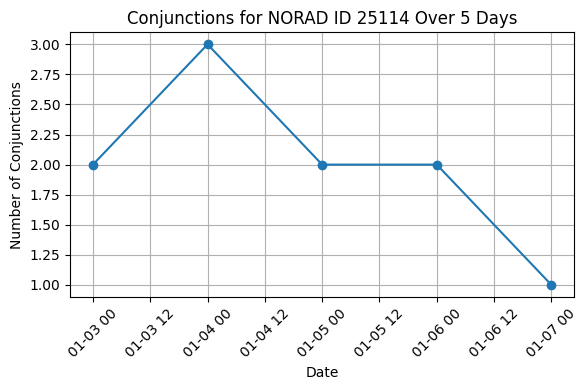

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of conjunctions over time
plt.figure(figsize=(6, 4))
plt.plot(conjunctions_df['Date'], conjunctions_df['Number of Conjunctions'], marker='o')
plt.title(f'Conjunctions for NORAD ID {norad_id} Over 5 Days')
plt.xlabel('Date')
plt.ylabel('Number of Conjunctions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

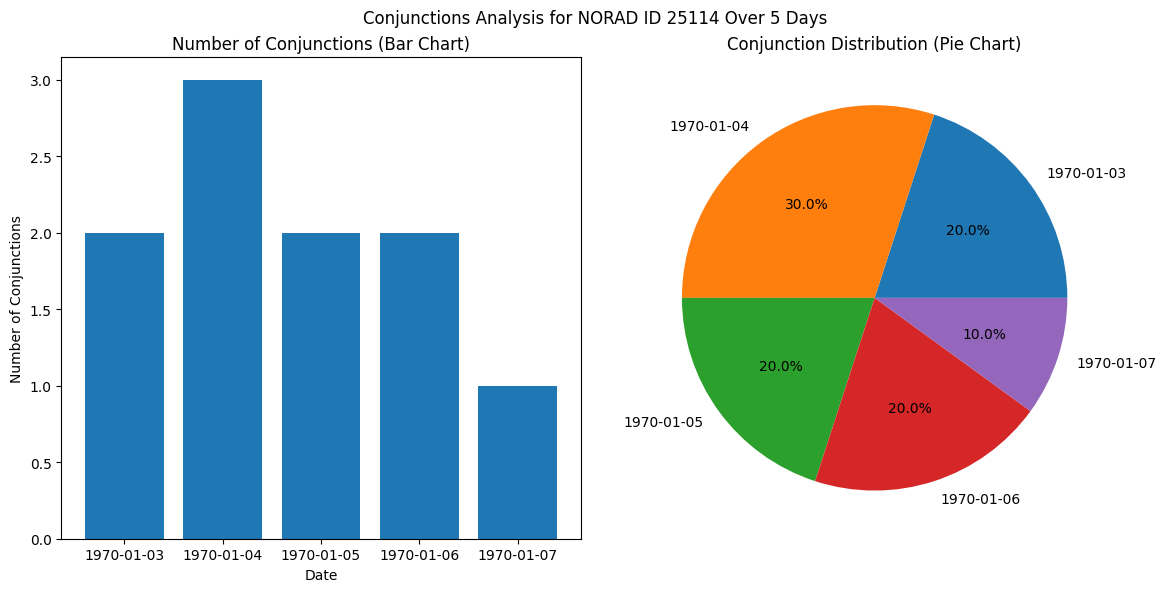

In [ ]:
# Initialize a list to store the number of conjunctions for each day
num_conjunctions = []

# Iterate through the date range and count conjunctions for each day
for date in date_range:
    num_conjunctions.append(len(filtered_data[filtered_data['Date (Satellite 1)'].dt.date == date.date()]))

# Create subplots for multiple visualizations
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f'Conjunctions Analysis for NORAD ID {norad_id} Over 5 Days')

# Visualization 1: Bar Chart
axs[0].bar(date_range, num_conjunctions)
axs[0].set_title('Number of Conjunctions (Bar Chart)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Conjunctions')

# Visualization 2: Pie Chart
axs[1].pie(num_conjunctions, labels=date_range.date, autopct='%1.1f%%')
axs[1].set_title('Conjunction Distribution (Pie Chart)')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()